# Локализация. Упражнения

В этих упражнениях вам предлагается реализовать простые алгоритмы локализации роботов. На лекции, помимо фильтра частиц, были упомянуты методы триангуляции и альфа-бета фильтр. Давайте их реализуем: обе реализации должны быть сделаны в виде класса, у которого должен быть метод update. Метод update принимает на вход измеренения с камеры о положении ориентиров в сосбтвенной системе координат робота.

В качестве ориентиров будем использовать координаты стоек ворот. Для удобства будем пользоваться упрощенным вариантом, при котором ворота разных цветов. В словаре храняться положения стоек в глобальной системе координат (точка (0, 0) нахождится в центре поля)

In [ ]:
!pip3 install matplotlib

In [ ]:
landmarks = {
    "blue_posts": [
        [ -4.5, -1.0], [ -4.5, 1.0]
    ],
    "yellow_posts":[
        [ 4.5, -1.0], [ 4.5, 1.0]
    ]
}

Пример данных, которые могут поступать в модуль на одном шаге всей системы. Данные во втором словаре – это данные одометрии с собвственной информацией робота о перемещении за один шаг системы. Для проверки работы придумайте и запишите набор данных с такой же структурой. 

In [ ]:
observations = {"yellow_posts":[[4.45, -0.99],[4.49, 1.09]], "blue_posts":[]}
shift = {'shift_x':0.0, 'shift_y':0.01, 'shift_angle':-0.4}

### 1) Реализовать локализацию триангуляцией (3 балл)
    

In [ ]:
class localization_triangulation:
    
    #put your code here
    
    pass
    
    def update():
        
        #put your code here
        
        pass

### 2) Дополнить предыдущий пункт до альфа-бета фильтра (5 балла)

In [ ]:
class localization_alphabeta:
    
    #put your code here
    
    pass
    
    def update():
        
        #put your code here
        
        pass

### 3) *Дополнительно* Добавьте визуализацию вида сверху  (2 балла)

Например на OpenCV или Matplotlib, например так как было в семинаре, чтобы можно было удобно посмотреть на работу модуля.


In [ ]:
class Field:
  def __init__(self, field_param):
    self.field = field_param
    self.w_width = field_param['main_rectangle'][0][0]
    self.w_length = field_param['main_rectangle'][0][1]

In [ ]:
parfield = {
    "circles": [
                [0.0, 0.0,1.0]
    ], 
    "lines":[
             [[-3.0,3.0], [0.0, 0.0]]
    ], 
    "points":[
              [0, 0]
    ],
    "main_rectangle":[
                      [6.0, 9.0]
    ], 
    "rectangles":[
                  [[-1, -4.5], 2,1], [[-1, 3.5],2,1]
    ]
}

In [ ]:
import math
import matplotlib.pylab as plt
field = Field(parfield)
def visualization(robot, apr = True, factor = 7):
  plt.figure("robot ", figsize=(field.w_width, field.w_length))
  plt.title('particle filter')

  grid = [-field.w_width/2.0, field.w_width/2.0, -field.w_length/2.0, field.w_length/2.0]
  ax = plt.axis(grid)
  for el in field.field:
    if el == 'circles':
      for circle in field.field['circles']:
        plot_circle = plt.Circle((circle[0], circle[1]), circle[2], linewidth=2, fill =False, edgecolor = 'r')
        plt.gca().add_patch(plot_circle)
    if el == 'lines':
      for line in field.field['lines']:
        plot_line = plt.Line2D(line[0], line[1], linewidth = 2, linestyle = '-', color = '#330000')
        plt.gca().add_line(plot_line)
    if el == 'rectangles':
      for rectangle in field.field['rectangles']:
        rect = plt.Rectangle(rectangle[0], rectangle[1],rectangle[2], linewidth = 2, linestyle = '-', fill = False)
        plt.gca().add_patch(rect)
    if apr != False:
      circle = plt.Circle((robot.y, robot.x), 1./factor, facecolor='#FF66E9', edgecolor='#FF66E9')
      plt.gca().add_patch(circle)

      arrow = plt.Arrow(robot.y, robot.x, 3*math.sin(robot.yaw)/factor, 3*math.cos(robot.yaw)/factor, width=1/factor)
      plt.gca().add_patch(arrow)

  for lm in landmarks:
    for lms in landmarks[lm]:
      if lm == "yellow_posts":
        circle = plt.Circle((lms[0], lms[1]), 1./factor, facecolor ='#ffff00', edgecolor = '#330000')
        plt.gca().add_patch(circle)
      else:
        circle = plt.Circle((lms[0], lms[1]), 1./factor, facecolor = '#060C73', edgecolor = '#330000')
        plt.gca().add_patch(circle)


In [ ]:
class Robot:
  def __init__(self, x=0, y =0, yaw=0):
    self.x = x
    self.y = y
    self.yaw = yaw

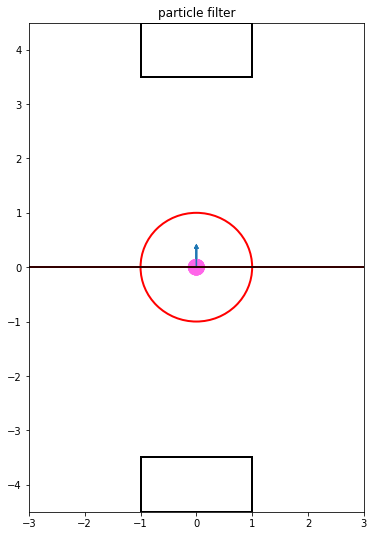

In [ ]:
visualization(Robot(0.0,0.0,0.0))